# Intercomparison Campaigns - Reconstruct Graphics of Beelitz' Intercomparison Campaign 1958

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to demonstrate the usability of data from intercomparison campaigns.

    Author: U. Voggenberger
    Date: 09.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020

In [1]:
import pandas
import numpy as np
import datetime
import glob
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import cdsapi, zipfile, os, time, sys

# Please note: Server URL will be omitted, once published
c = cdsapi.Client(url='https://sis-dev.climate.copernicus.eu/api/v2')
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

In [2]:
fs = open('path.txt', 'r')
path = fs.read()  
fs.close()
sys.path.append(path)

import cds_eua3 as eua
eua.logging_set_level(30)

In [3]:
plt.rcParams['figure.figsize'] = (10,10)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

---

In [4]:
# creating a list of files to open - selcting every aggregated file:
filestoopen = glob.glob('/raid60/scratch/leo/scratch/RI/Pangaea/nc/0-20100-0-004*.nc', recursive=True)
for i in range(len(filestoopen)):
    filestoopen[i] = filestoopen[i][42:-3]
print(filestoopen)

['0-20100-0-00401', '0-20100-0-00402', '0-20100-0-00403', '0-20100-0-00404', '0-20100-0-00405', '0-20100-0-00406', '0-20100-0-00407', '0-20100-0-00408', '0-20100-0-00409', '0-20100-0-00410', '0-20100-0-00411', '0-20100-0-00413', '0-20100-0-00412', '0-20100-0-00414']


In [5]:
# requesting and downloading the data:
t0 = time.time()
# Start Request
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {
                   'variable': ["air_temperature"],
                   'overwrite': True,
                   'statid': filestoopen,
                   'optional': ['sonde_type'],
                   'format': 'csv'                   
               })

if True:
    # Start Download
    r.download(target='download.zip')
    # Check file size
    assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    # Unzip the Data Stream
    z = zipfile.ZipFile('download.zip')
    print("Unzipping retrieved files: to ./exampla_data/2")
    print(z.namelist())
    z.extractall(path='./example_data/2')
    z.close()
    os.remove('download.zip')
    print("Time elapsed: ", time.time()-t0, "s")

2020-10-01 10:12:10,220 INFO Welcome to the CDS
2020-10-01 10:12:10,221 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-01 10:12:10,470 INFO Request is completed
2020-10-01 10:12:10,471 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601535150.9960856-14447-26-5c892d02-527d-4e07-9e7f-64336c64f1ae.zip to download.zip (298.1K)
2020-10-01 10:12:10,727 INFO Download rate 1.1M/s 


Unzipping retrieved files: to ./exampla_data/2
['temperature.csv']
Time elapsed:  0.6682627201080322 s


In [6]:
data = pandas.read_csv('example_data/2/temperature.csv', index_col=0)
data

,lat,lon,plev,ta,time,sonde_type,trajectory_label,statid,statindex
obs_id,,,,,,,,,
0,46.812,6.942,5900.0,216.05,1956-05-28 10:20:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
1,46.812,6.942,5900.0,NaN,1956-05-28 10:20:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
2,46.812,6.942,6400.0,215.05,1956-05-28 10:19:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
3,46.812,6.942,6400.0,NaN,1956-05-28 10:19:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
4,46.812,6.942,7100.0,217.45,1956-05-28 10:18:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
...,...,...,...,...,...,...,...,...,...
31843,46.812,6.942,90800.0,NaN,1956-06-14 21:05:00,"DL2,",0-20100-0-00402-054,0-20100-0-00402,13
31844,46.812,6.942,94500.0,285.05,1956-06-14 21:04:00,"DL2,",0-20100-0-00402-054,0-20100-0-00402,13
31845,46.812,6.942,94500.0,NaN,1956-06-14 21:04:00,"DL2,",0-20100-0-00402-054,0-20100-0-00402,13


In [7]:
data.sonde_type.drop_duplicates()

obs_id
0         DG2
3164     FM_,
5452     IF1,
7512      GKB
9694      BHP
11388     S03
14010    U4_,
16774    VU_,
19056    RSS,
21466     JM_
23838     BPL
25466    IC1,
27278     BBI
29384    DL2,
Name: sonde_type, dtype: object

In [8]:
x = data
x.time = pandas.to_datetime(x['time'], format='%Y-%m-%d %H:%M:%S')
type(x.iloc[0].time)

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
x

,lat,lon,plev,ta,time,sonde_type,trajectory_label,statid,statindex
obs_id,,,,,,,,,
0,46.812,6.942,5900.0,216.05,1956-05-28 10:20:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
1,46.812,6.942,5900.0,NaN,1956-05-28 10:20:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
2,46.812,6.942,6400.0,215.05,1956-05-28 10:19:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
3,46.812,6.942,6400.0,NaN,1956-05-28 10:19:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
4,46.812,6.942,7100.0,217.45,1956-05-28 10:18:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
...,...,...,...,...,...,...,...,...,...
31843,46.812,6.942,90800.0,NaN,1956-06-14 21:05:00,"DL2,",0-20100-0-00402-054,0-20100-0-00402,13
31844,46.812,6.942,94500.0,285.05,1956-06-14 21:04:00,"DL2,",0-20100-0-00402-054,0-20100-0-00402,13
31845,46.812,6.942,94500.0,NaN,1956-06-14 21:04:00,"DL2,",0-20100-0-00402-054,0-20100-0-00402,13


---

In [10]:
# Aufteilen in Tag und Nacht
da = x
da_day = da.iloc[0:0]
da_night = da.iloc[0:0]
for j in range(len(da)):
    if(da.iloc[j].time.hour < 17. and da.iloc[j].time.hour > 6.):
        da_day = da_day.append(da.iloc[j], ignore_index = True)
    else:
        da_night = da_night.append(da.iloc[j], ignore_index = True)

In [11]:
da_day

,lat,lon,plev,ta,time,sonde_type,trajectory_label,statid,statindex
0,46.812,6.942,5900.0,216.05,1956-05-28 10:20:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
1,46.812,6.942,5900.0,NaN,1956-05-28 10:20:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
2,46.812,6.942,6400.0,215.05,1956-05-28 10:19:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
3,46.812,6.942,6400.0,NaN,1956-05-28 10:19:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
4,46.812,6.942,7100.0,217.45,1956-05-28 10:18:00,DG2,0-20100-0-00408-002,0-20100-0-00408,0
...,...,...,...,...,...,...,...,...,...
15101,46.812,6.942,88100.0,NaN,1956-06-14 11:58:00,"DL2,",0-20100-0-00402-053,0-20100-0-00402,13
15102,46.812,6.942,91900.0,282.55,1956-06-14 11:57:00,"DL2,",0-20100-0-00402-053,0-20100-0-00402,13
15103,46.812,6.942,91900.0,NaN,1956-06-14 11:57:00,"DL2,",0-20100-0-00402-053,0-20100-0-00402,13
15104,46.812,6.942,96550.0,287.05,1956-06-14 10:58:00,"DL2,",0-20100-0-00402-053,0-20100-0-00402,13


In [12]:
da_day[0::2].sonde_type.drop_duplicates()

0         DG2
1730     FM_,
2722     IF1,
3712      GKB
4646      BHP
5426      S03
6750     U4_,
8018     VU_,
9176     RSS,
10276     JM_
11286     BPL
12220    IC1,
12812     BBI
13854    DL2,
Name: sonde_type, dtype: object

---

In [13]:
x = da_day[0::2]
# x = x[~np.isnan(x.ta)]
sond_all = []
temp_all = []

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k))

In [14]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [15]:
# generating mean values
newmeans = []
for o in means:
    sums = [0]*9
    for i in range(len(o)):
        for j in range(len(o[i])):
            if(not np.isnan(o[i][j])):
                sums[j] = sums[j] + o[i][j]
            else:
                try:
                    sums[j] = sums[j] + sums[j]/i
                except:
                    pass
    newmeans.append(np.array(sums)/len(o))

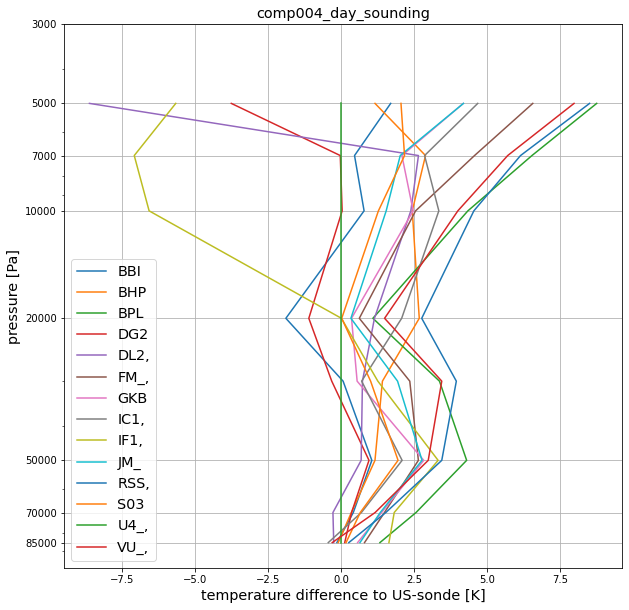

In [16]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((np.array(newmeans[i]) - np.array(newmeans[-2])), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_day_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

In [17]:
x = da_night[0::2]
# x = x[~np.isnan(x.ta)]
sond_all = []
temp_all = []

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k))

In [18]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [19]:
# generating mean values
newmeans = []
for o in means:
    sums = [0]*9
    for i in range(len(o)):
        for j in range(len(o[i])):
            if(not np.isnan(o[i][j])):
                sums[j] = sums[j] + o[i][j]
            else:
                try:
                    sums[j] = sums[j] + sums[j]/i
                except:
                    pass
    newmeans.append(np.array(sums)/len(o))

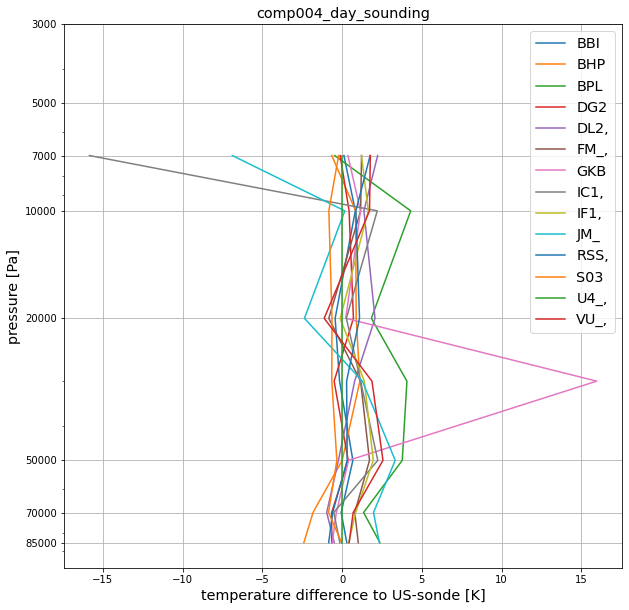

In [20]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((np.array(newmeans[i]) - np.array(newmeans[-2])), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_day_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

## "Es wurden jeweils die Differenzen zwischen den Daten der systematischen Differenzen nach Durchführung der Iteration und den Beträgen der amerikanischen (Radiosonden-Type Nr. 4) gebildet, also (RS_x - RS_4) und dann erst wieder analog der Tabellen 3, 6 und 8 die gewogenen Mittel gebildet." 

In [21]:
x = da_day[0::2]
# x = x[~np.isnan(x.ta)]
sond_all = []
temp_all = []

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k-mean_temp))

In [22]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [23]:
# generating mean values
newmeans = []
for o in means:
    sums = [0]*9
    for i in range(len(o)):
        for j in range(len(o[i])):
            if(not np.isnan(o[i][j])):
                sums[j] = sums[j] + o[i][j]
            else:
                try:
                    sums[j] = sums[j] + sums[j]/i
                except:
                    pass
    newmeans.append(np.array(sums)/len(o))

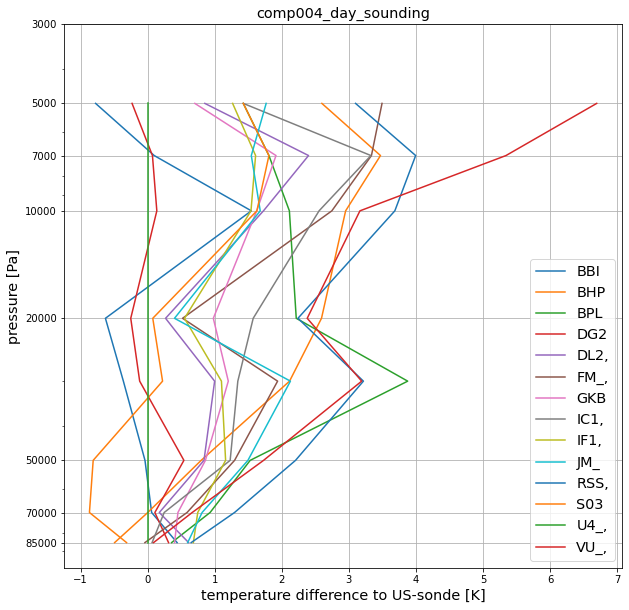

In [24]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((np.array(newmeans[i]) - np.array(newmeans[-2])), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_day_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

In [25]:
x = da_night[0::2]
# x = x[~np.isnan(x.ta)]
sond_all = []
temp_all = []

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k-mean_temp))

In [26]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [27]:
# generating mean values
newmeans = []
for o in means:
    sums = [0]*9
    for i in range(len(o)):
        for j in range(len(o[i])):
            if(not np.isnan(o[i][j])):
                sums[j] = sums[j] + o[i][j]
            else:
                try:
                    sums[j] = sums[j] + sums[j]/i
                except:
                    pass
    newmeans.append(np.array(sums)/len(o))

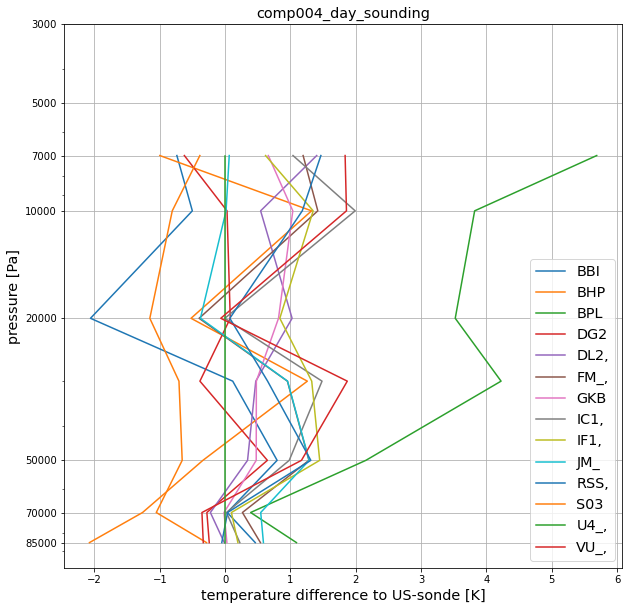

In [28]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((np.array(newmeans[i]) - np.array(newmeans[-2])), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_day_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()